Guiding questions: 
At what companies do developers get paid the most?
How much does remote working matter to employees?
How does coding experience affect the level of pay?
What's the most popular method of learning to code?
Are you more likely to get a job as a developer if you have a master's degree?

First we install all the libraries we will be needing in this project. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("survey_results_public.csv")

In [5]:
print(df.head(100))


    ResponseId     Q120                      MainBranch              Age  \
0            1  I agree                   None of these  18-24 years old   
1            2  I agree  I am a developer by profession  25-34 years old   
2            3  I agree  I am a developer by profession  45-54 years old   
3            4  I agree  I am a developer by profession  25-34 years old   
4            5  I agree  I am a developer by profession  25-34 years old   
..         ...      ...                             ...              ...   
95          96  I agree  I am a developer by profession  18-24 years old   
96          97  I agree  I am a developer by profession  25-34 years old   
97          98  I agree  I am a developer by profession  25-34 years old   
98          99  I agree  I am a developer by profession  35-44 years old   
99         100  I agree  I am a developer by profession  25-34 years old   

                                           Employment  \
0                             

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [7]:
#to see what our missing values are!
missing_values= df.isnull().sum()
data_types=df.dtypes

In [8]:
missing_values

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

1-At what companies do developers get paid the most?
for this we need to clean the industry column and remove all the rows where information is missing.

In [12]:
# Remove rows with missing 'ConvertedCompYearly' or 'Industry' data 
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'Industry'])

# Clean the 'Industry' column for consistency removing the spaces at the beginning and end basically 
df_cleaned['Industry'] = df_cleaned['Industry'].str.strip()

#calculating the avg compensation by industry we want it grouped by the industry but the avg of ConvertedCompYearly 
average_comp_by_industry_cleaned = df_cleaned.groupby('Industry')['ConvertedCompYearly'].mean().sort_values(ascending=False)

top_10_industries_cleaned = average_comp_by_industry_cleaned.head(10)

top_10_industries_cleaned


C:\Users\L\AppData\Local\Temp\ipykernel_5552\2363392958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Industry'] = df_cleaned['Industry'].str.strip()


Industry
Other                                                                  124288.992366
Financial Services                                                     123977.345539
Advertising Services                                                   112730.652033
Healthcare                                                             103571.103408
Insurance                                                              100366.450435
Retail and Consumer Services                                            98211.981959
Information Services, IT, Software Development, or other Technology     94924.338332
Manufacturing, Transportation, or Supply Chain                          89943.515242
Oil & Gas                                                               88982.888889
Legal Services                                                          88300.562130
Name: ConvertedCompYearly, dtype: float64

How much does remote working matter to employees?


In [13]:
df_cleaned = df.dropna(subset=['ConvertedCompYearly','RemoteWork'])

df_cleaned['RemoteWork'] = df_cleaned['RemoteWork'].str.strip()

#Return a Series containing counts of unique values. and if normalize=True If True then the object returned will contain the relative frequencies of the unique values
remote_work_distribution = df_cleaned['RemoteWork'].value_counts(normalize=True) * 100

average_comp_by_remote_work= df_cleaned.groupby('RemoteWork')['ConvertedCompYearly'].mean().sort_values(ascending=False)

remote_work_distribution,average_comp_by_remote_work


C:\Users\L\AppData\Local\Temp\ipykernel_5552\1371659233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['RemoteWork'] = df_cleaned['RemoteWork'].str.strip()


(Remote                                  44.092616
 Hybrid (some remote, some in-person)    42.294535
 In-person                               13.612849
 Name: RemoteWork, dtype: float64,
 RemoteWork
 Remote                                  112141.268001
 Hybrid (some remote, some in-person)    100216.214934
 In-person                                70646.002145
 Name: ConvertedCompYearly, dtype: float64)

What's the most popular method of learning to code?

In [17]:
learning_methods_column="LearnCode"

if learning_methods_column in df.columns:
    #seperate the multiple learning methods by semicolons and creates a list of methods for each respondent 
    all_methods= df[learning_methods_column].dropna().str.split(';')
    #all methods is a list of lists basically and we use strip() ti remove any leading or trailing spaces from each method
    flat_list= [item.strip() for sublist in all_methods for item in sublist]
    
    #counting each method frequency counter class is used to count the frequency 
    from collections import Counter
    method_counts= Counter(flat_list)
    
    #convert to a dataframe and sort it 
    method_counts_df = pd.DataFrame(method_counts.items(), columns=['Method', 'Count']).sort_values(by='Count', ascending=False)
    
    # Visualization of the top methods
    top_methods = method_counts_df.head(10)
else:
    top_methods = "Learning methods column does not exist in the dataset."

top_methods

,Method,Count
6,"Other online resources (e.g., videos, blogs, f...",70244
0,Books / Physical media,45406
7,"School (i.e., University, College, etc)",43957
4,Online Courses or Certification,43201
5,On the job training,40380
1,Colleague,20523
2,Friend or family member,9936
8,Coding Bootcamp,8602
3,Hackathons (virtual or in-person),7033
9,Other (please specify):,5451


How does coding experience affect the level of pay?

In [18]:
#checking if we have the columns in our dataframe that we need
experience_columns = [col for col in df.columns if 'year' in col.lower() or 'experience' in col.lower()]

#we want to directly use YearsCoding if it exists if not we will go back to our first step 
experience_column_name = 'YearsCoding' if 'YearsCoding' in experience_columns else experience_columns[0] if experience_columns else None

#This line is a general approach to cleaning the experience data. It attempts to extract numerical values from the experience column, converting it to float for numerical analysis. 
df_cleaned[experience_column_name] = df_cleaned[experience_column_name].astype(str).str.extract('(\d+)').astype(float)

#dropping missing values 
df_experience_cleaned = df_cleaned.dropna(subset=[experience_column_name, 'ConvertedCompYearly'])

#getting the avg and sorting the value 
average_comp_by_experience = df_experience_cleaned.groupby(experience_column_name)['ConvertedCompYearly'].mean().sort_values()


C:\Users\L\AppData\Local\Temp\ipykernel_5552\3485771407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[experience_column_name] = df_cleaned[experience_column_name].astype(str).str.extract('(\d+)').astype(float)


<AxesSubplot:title={'center':'Average Compensation by Coding Experience'}, xlabel='YearsCode'>

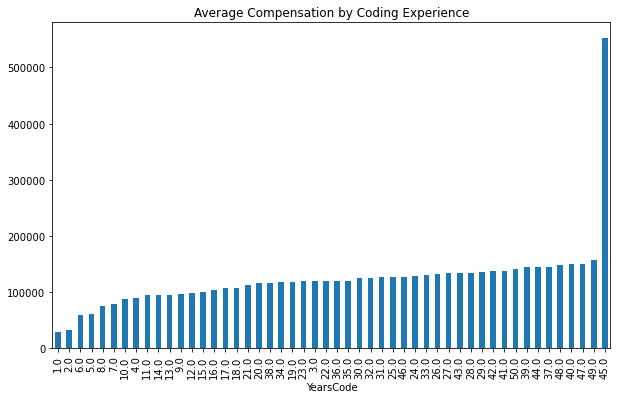

In [21]:
average_comp_by_experience.plot(kind='bar', figsize=(10, 6), title="Average Compensation by Coding Experience")

Are you more likely to get a job as a developer if you have a master's degree?

In [27]:
education_column = 'EdLevel'
employment_column = 'Employment'

# Clean and standardize the education level data
df[education_column] = df[education_column].str.strip().str.lower()

#rows with masters degree
masters_degree = df[df[education_column].str.contains("master's", na=False)]

no_masters_degree = df[~df[education_column].str.contains("master's|doctorate", na=False)]


#avg of employment with and without a masters degree
employed_masters= masters_degree[employment_column].str.contains('Employed', na=False).mean()
employed_no_masters = no_masters_degree[employment_column].str.contains('Employed', na=False).mean()

results = {
    "With Master's Degree": employed_masters,
    "Without Master's Degree": employed_no_masters
}

results

{"With Master's Degree": nan, "Without Master's Degree": 0.7335172228202368}